https://github.com/MasterMaps/N2000-Kartdata

https://www.ssb.no/en/fnr

In [1]:
# Import packages 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize
from mpl_toolkits.basemap import Basemap as Basemap

In [2]:
# data for choropleth
d = {'Østfold': 2.5,
 'Akershus': 2.5,
 'Oslo': 2.8,
 'Hedmark': 2.2,
 'Oppland': 2.3,
 'Buskerud': 2.0,
 'Vestfold': 2.1,
 'Telemark': 0.7,
 'Aust-Agder': 2.5,
 'Vest-Agder': 0.9,
 'Rogaland': -0.4,
 'Hordaland': 1.2,
 'Sogn og Fjordane': 1.6,
 'Møre og Romsdal': 0.7,
 'Sør-Trøndelag': 2.9,
 'Nord-Trøndelag': 2.9,
 'Nordland': 1.9,
 'Troms': 2.1,
 'Finnmark': 2.0}

In [3]:
# Map values to colors
cm = plt.cm.rainbow_r
norm = Normalize(-2, 4)

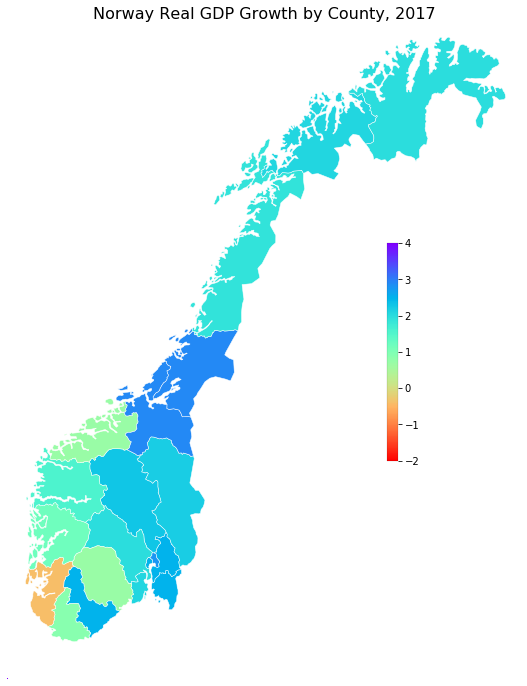

In [4]:
# Create map with lcc projection and boundaries that tightly frame Norway
m = Basemap(llcrnrlon=5, llcrnrlat=57, urcrnrlon=33, urcrnrlat=71,
            projection='lcc', lat_1=57, lon_0=15)

fig = plt.figure(figsize=(8, 16))

m.drawmapboundary()
m.readshapefile('shapefiles/NO_Fylker_pol_latlng', 'no_co', 
                drawbounds=False,
                default_encoding='latin-1')

ax = plt.gca()
ax.axis('off')

for info, shape in zip(m.no_co_info, m.no_co):
    fc = cm(norm(d[info['NAVN']]))
    ax.add_patch(Polygon(shape, fc=fc, ec='white', lw=0.5))
    
plt.title(f'Norway Real GDP Growth by County, 2017', fontsize=16)
cb = fig.colorbar(ax.imshow([np.array([-2, 4])], cm), shrink=0.25, pad=-0.3)
cb.outline.set_linewidth(0.1)